In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("isc-gem-cat.csv.csv", skiprows=108, header=1)
df.columns = df.columns.str.strip()
df.head()

<ipython-input-2-5e1c57d1e6d8>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("isc-gem-cat.csv.csv", skiprows=108, header=1)


,# date,lat,lon,smajax,sminax,strike,q,depth,unc,q .1,...,mtp,mtt,str1,dip1,rake1,str2,dip2,rake2,type,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-08-30 11:43:20.85,30.684,100.608,16.9,14.4,118.4,C,15.0,25.0,C,...,,,,,,,,,,16957826


In [ ]:
features = ['lat', 'lon', 'smajax', 'sminax', 'depth']
df_cleaned = df[features].dropna()
for feature in features:
    if df_cleaned[feature].dtype == object:
        df_cleaned[feature] = df_cleaned[feature].str.strip()

    df_cleaned[feature] = pd.to_numeric(df_cleaned[feature], errors='coerce')
df_cleaned = df_cleaned.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [ ]:
inertia = []
k_range = range(1,30)  # Checking for k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

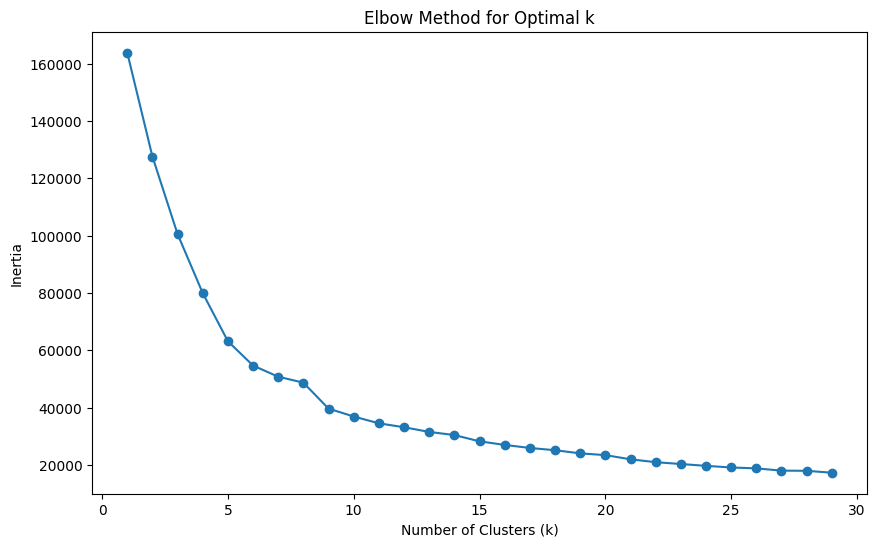

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
df_cleaned['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df_cleaned, lat='lat', lon='lon', color='kmeans_cluster',
                     projection="natural earth", title="KMeans Clustering on World Map")
fig.show()

DBSCAN

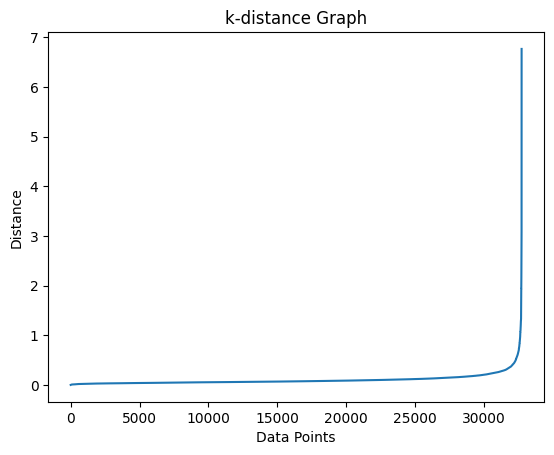

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calculate distances to kth nearest neighbor
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

# Sort distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot k-distance graph
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.04, min_samples=15)
df_cleaned['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

In [ ]:

import plotly.express as px

fig = px.scatter_geo(df_cleaned, lat='lat', lon='lon', color='dbscan_cluster',
                     projection="natural earth", title="DBSCAN Clustering on World Map")
fig.show()


Hierarchical Clustering

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

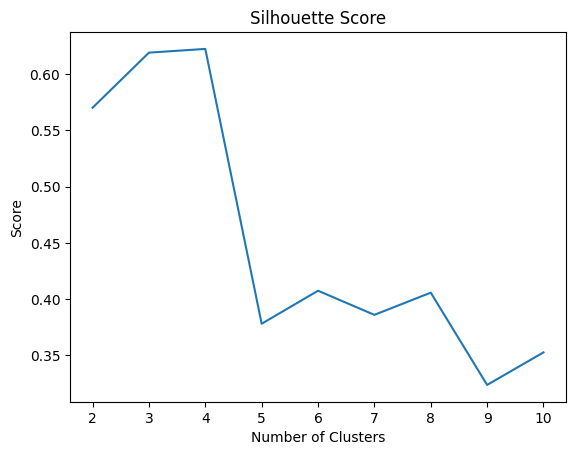

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=i)
    labels = agg.fit_predict(df_cleaned)
    score = silhouette_score(df_cleaned, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [ ]:
agg = AgglomerativeClustering(n_clusters=5)
df_cleaned['hierarchical_cluster'] = agg.fit_predict(scaled_data)

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df_cleaned, lat='lat', lon='lon', color='hierarchical_cluster',
                     projection="natural earth", title="Hierarchical Clustering on World Map")
fig.show()

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np


n_components_range = range(1, 11)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_cleaned)
    bics.append(gmm.bic(df_cleaned))
    aics.append(gmm.aic(df_cleaned))

optimal_n_components_bic = n_components_range[np.argmin(bics)]
optimal_n_components_aic = n_components_range[np.argmin(aics)]

print(f"Optimal number of components (BIC): {optimal_n_components_bic}")
print(f"Optimal number of components (AIC): {optimal_n_components_aic}")

Optimal number of components (BIC): 10
Optimal number of components (AIC): 10


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=40)
df_cleaned['gmm_cluster'] = gmm.fit_predict(scaled_data)

fig = px.scatter_geo(df_cleaned, lat='lat', lon='lon', color='gmm_cluster',
                     projection="natural earth", title="GMM Clustering on World Map")
fig.show()